# Video Games Sales Analysis Using R
    Video game is a popular means of entertainment that has grown rapidly in the last few decades. This development has resulted in the continued emergence of new game titles, as well as video game platforms that continue to evolve with each generation. This is inevitable if the popularity and sales of video game consumption continues to increase. Therefore, I wanted to analyze the sales of video games using public data in Kaggle.
    
    The dataset used can be accessed at the link below
    https://www.kaggle.com/datasets/ulrikthygepedersen/video-games-sales

## Load Packages 

In [2]:
#Install packages
library("tidyverse")
library("dplyr")
library("ggplot2")
library("tidyr")

#"tidyverse" package is actually enough, because it already contains the packages we need.

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## **Import and Clean Dataset**

In [3]:
#import dataset
vg <- read_csv("/kaggle/input/video-games-sales/video_games_sales.csv", show_col_types = FALSE)

In [4]:
#View dataset
View(vg)
head(vg)
tail(vg)

rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62


rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26


rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
16595,Plushees,DS,2008,Simulation,Destineer,0.01,0.00,0,0,0.01
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0,0,0.01
16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0,0,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0,0,0.01
16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0,0,0.01
16600,Spirits & Spells,GBA,2003,Platform,Wanadoo,0.01,0.00,0,0,0.01


In [6]:
#View the structure of the dataset
str(vg)
summary(vg)

spc_tbl_ [16,598 × 11] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ rank        : num [1:16598] 1 2 3 4 5 6 7 8 9 10 ...
 $ name        : chr [1:16598] "Wii Sports" "Super Mario Bros." "Mario Kart Wii" "Wii Sports Resort" ...
 $ platform    : chr [1:16598] "Wii" "NES" "Wii" "Wii" ...
 $ year        : num [1:16598] 2006 1985 2008 2009 1996 ...
 $ genre       : chr [1:16598] "Sports" "Platform" "Racing" "Sports" ...
 $ publisher   : chr [1:16598] "Nintendo" "Nintendo" "Nintendo" "Nintendo" ...
 $ na_sales    : num [1:16598] 41.5 29.1 15.8 15.8 11.3 ...
 $ eu_sales    : num [1:16598] 29.02 3.58 12.88 11.01 8.89 ...
 $ jp_sales    : num [1:16598] 3.77 6.81 3.79 3.28 10.22 ...
 $ other_sales : num [1:16598] 8.46 0.77 3.31 2.96 1 0.58 2.9 2.85 2.26 0.47 ...
 $ global_sales: num [1:16598] 82.7 40.2 35.8 33 31.4 ...
 - attr(*, "spec")=
  .. cols(
  ..   rank = col_double(),
  ..   name = col_character(),
  ..   platform = col_character(),
  ..   year = col_double(),
  ..   genre = col_character(

      rank           name             platform              year     
 Min.   :    1   Length:16598       Length:16598       Min.   :1980  
 1st Qu.: 4151   Class :character   Class :character   1st Qu.:2003  
 Median : 8300   Mode  :character   Mode  :character   Median :2007  
 Mean   : 8301                                         Mean   :2006  
 3rd Qu.:12450                                         3rd Qu.:2010  
 Max.   :16600                                         Max.   :2020  
                                                       NA's   :271   
    genre            publisher            na_sales          eu_sales      
 Length:16598       Length:16598       Min.   : 0.0000   Min.   : 0.0000  
 Class :character   Class :character   1st Qu.: 0.0000   1st Qu.: 0.0000  
 Mode  :character   Mode  :character   Median : 0.0800   Median : 0.0200  
                                       Mean   : 0.2647   Mean   : 0.1467  
                                       3rd Qu.: 0.2400   3rd Qu.:

In [7]:
#Removes all the duplicated
vgs <- distinct(vg)

In [8]:
#Change type of the column, in this case we'll change the year column to integer
vgs$year <- as.integer(vgs$year)
class(vgs$year)

[1] "integer"

In [9]:
#check for blank rows
is.null(vgs)

[1] FALSE

In [10]:
#check for N/A value
vgs %>% 
  filter(!complete.cases(year)) %>% View

#We'll gonna leave the N/A value there

rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
180,Madden NFL 2004,PS2,NA,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
378,FIFA Soccer 2004,PS2,NA,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
432,LEGO Batman: The Videogame,Wii,NA,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
471,wwe Smackdown vs. Raw 2006,PS2,NA,Fighting,NA,1.57,1.02,0.00,0.41,3.00
608,Space Invaders,2600,NA,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
625,Rock Band,X360,NA,Misc,Electronic Arts,1.93,0.34,0.00,0.21,2.48
650,Frogger's Adventures: Temple of the Frog,GBA,NA,Adventure,Konami Digital Entertainment,2.15,0.18,0.00,0.07,2.39
653,LEGO Indiana Jones: The Original Adventures,Wii,NA,Action,LucasArts,1.54,0.63,0.00,0.22,2.39
713,Call of Duty 3,Wii,NA,Shooter,Activision,1.19,0.84,0.00,0.23,2.26


## **Analyze and Visualize**

**Number of Games Released Each Year**

In [11]:
#Data Manipulation
game_released_year <- vgs %>%
  group_by(year) %>%
  summarize(number_of_games_released = n()) %>%
  arrange(year) %>% 
  mutate(cumsum_number_of_games_released=cumsum(number_of_games_released))

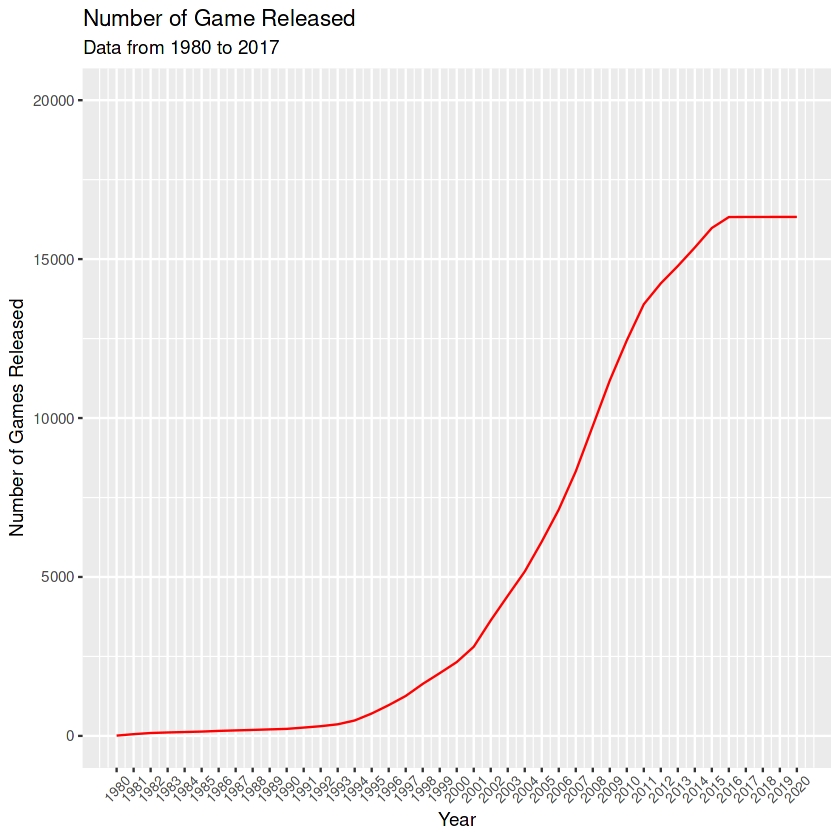

In [12]:
#Plot
ggplot(data = game_released_year,aes(x = year,y = cumsum_number_of_games_released)) +
  geom_line(col='red', na.rm=TRUE) +
  scale_x_continuous(breaks=c(1980:2020)) +
  ylim(0,20000) +
  labs(x='Year',y='Number of Games Released',
       title='Number of Game Released',
       subtitle='Data from 1980 to 2017') +
  theme(axis.text.x = element_text(size=8,angle=45,vjust=0.6))

We can see from the line graph above, that initially there was no significant increase in numbers from 1980 to 1993. But the year after, 1994, saw a rapid growth in the number of video game productions on various platforms. The rapid growth seemed to end in 2016, and there was no high growth until 2020. This could be due to the incomplete data available in this analysis.

**Platform Popularity by Released Games Each Year**

In [13]:
#data manipulation
vgs_plat <- vgs %>% 
  group_by(platform) %>% 
  summarize(count= n()) %>% 
  arrange(desc(count))

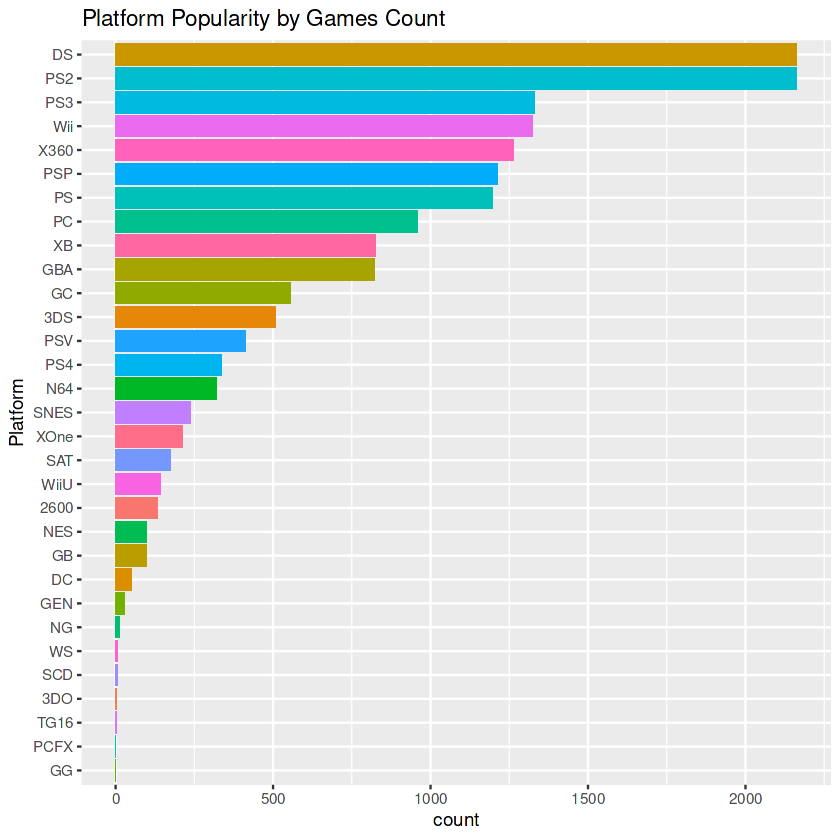

In [14]:
#plot
ggplot(data = vgs_plat, aes(y = reorder(platform, + count), x = count, fill=platform)) +
geom_bar(stat = "identity") +  theme(legend.position = "none") +
labs(title = "Platform Popularity by Games Count", y = "Platform")

From the data above, we can say that DS is the platform that has the most number of games from 1980 to 2017 combined. Followed by the PS2 and PS3 platforms in second and third place. While the next position is the Wii and X360 platforms. It can be said that there are 3 companies that lead in console development based on this data, namely Nintendo, Sony, and Microsoft.

**Platform Popularity by Sales**

In [15]:
#Manipulation
plat_global <- vgs %>%
  group_by (platform) %>%
  summarize(na_sales = sum(na_sales), eu_sales = sum(eu_sales), 
            jp_sales = sum(jp_sales), other_sales = sum(other_sales), total_sales = sum(global_sales), 
            total_sales2 =sum(na_sales + eu_sales + jp_sales + other_sales))
#we add another total column to make sure the total of every region is correct.

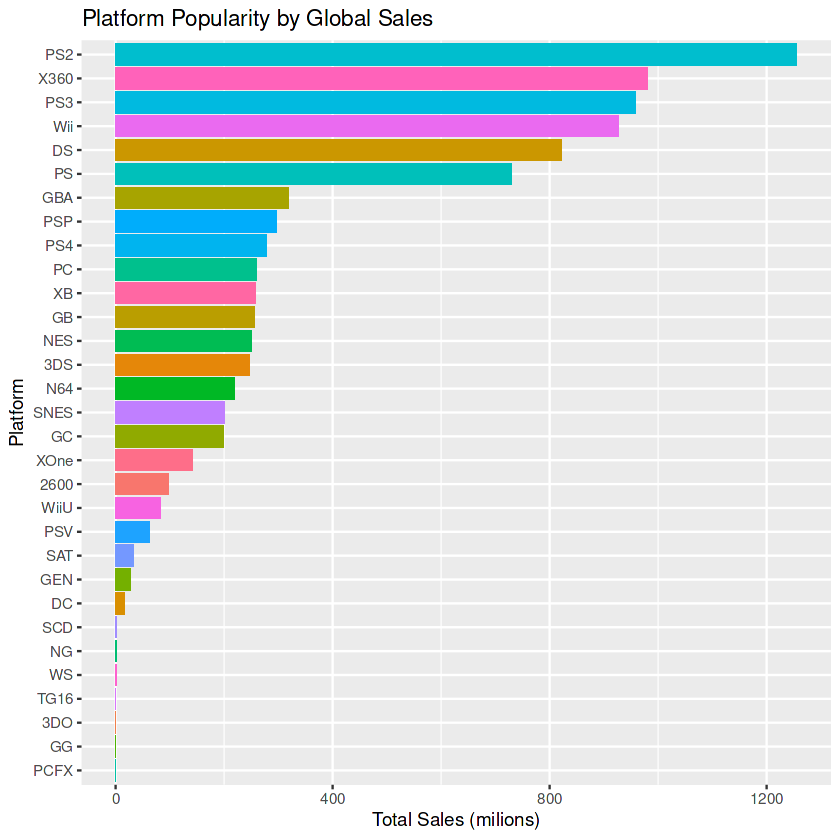

In [16]:
#Plot
ggplot(data = plat_global, aes(y = reorder(platform, + total_sales), x = total_sales, fill=platform)) + 
  geom_bar(stat = "identity") + theme(legend.position = "none") +
  labs(title = "Platform Popularity by Global Sales", x = "Total Sales (milions)", y = "Platform")

Quite different when compared to popularity based on total games released. If based on the total number of sales, the PS2 platform ranks first, followed by the Xbox 360, PS3, Wii, and PS4. Although the rankings have changed, the top 5 most popular video game platforms are still dominated by the same platforms as before.

**Sales PS3, X360, PS4, and Xbox One**

In [17]:
#Data Manipulation (PS3)
PS3_year <- vgs %>%
  select(platform, year, global_sales) %>% 
  filter(platform == "PS3") %>% 
  group_by(year) %>% 
  summarise(number_of_games_sales = n()) %>%
  arrange(year) %>% 
  mutate(cumsum_sales = cumsum(number_of_games_sales))

#Data Manipulation (X360)
X360_year <- vgs %>%
  select(platform, year, global_sales) %>% 
  filter(platform == "X360") %>% 
  group_by(year) %>% 
  summarise(number_of_games_sales = n()) %>%
  arrange(year) %>% 
  mutate(cumsum_sales = cumsum(number_of_games_sales))
  
#Data Manipulation  (PS4)
PS4_year <- vgs %>%
  select(platform, year, global_sales) %>% 
  filter(platform == "PS4") %>% 
  group_by(year) %>% 
  summarise(number_of_games_sales = n()) %>%
  arrange(year) %>% 
  mutate(cumsum_sales = cumsum(number_of_games_sales))

#Data Manipulation (X360)
XOne_year <- vgs %>%
  select(platform, year, global_sales) %>% 
  filter(platform == "XOne") %>% 
  group_by(year) %>% 
  summarise(number_of_games_sales = n()) %>%
  arrange(year) %>% 
  mutate(cumsum_sales = cumsum(number_of_games_sales))

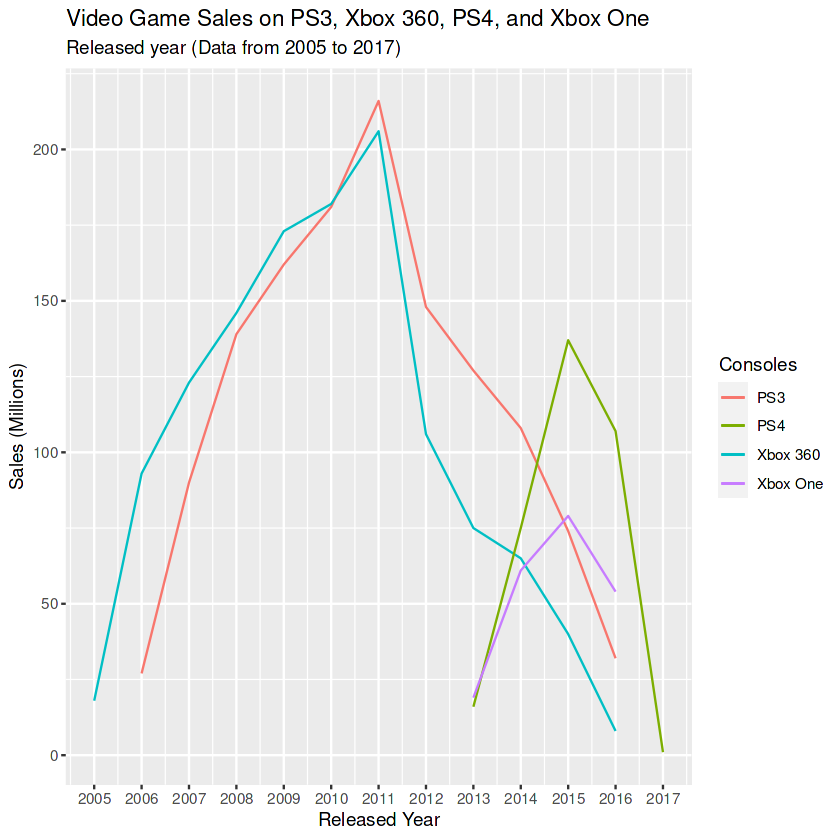

In [18]:
#Plot
ggplot() + 
  geom_line(PS3_year,
            mapping=aes(year,number_of_games_sales,col='PS3'), na.rm=TRUE) +
  geom_line(X360_year,
            mapping=aes(year,number_of_games_sales,col='Xbox 360'), na.rm=TRUE) +
  geom_line(PS4_year,
            mapping=aes(year,number_of_games_sales,col='PS4'), na.rm=TRUE) +
  geom_line(XOne_year,
            mapping=aes(year,number_of_games_sales,col='Xbox One'), na.rm=TRUE) +
  scale_color_discrete(name = "Consoles") +
  labs(x="Released Year",y="Sales (Millions)",
       title="Video Game Sales on PS3, Xbox 360, PS4, and Xbox One",
       subtitle="Released year (Data from 2005 to 2017)") +
  scale_x_continuous(breaks=c(2005:2017))

The data above is individual sales data for each year on each console platform.
Compared to the PS3, the Xbox 360 console continued to lead video game sales from its initial release in 2005 until 2009. But in 2010 PS3 game sales surpassed Xbox 360 until 2011, but game sales on both consoles continued to increase. However, in the following years after 2011, game sales on both consoles decreased every year. This phenomenon can be assumed to occur due to the decreasing number of games released, which may also be due to the launch of the next generation of consoles in the following years.

In 2013, the launch of the consoles of the two video game giants, namely PS4 and Xbox One. Sales of both consoles continued to rise until 2015, led by the PS4.In 2015, the data chart above shows a decline in revenue for both consoles, which is most likely due to the lack of data in this analysis. From the data, it can be seen that the maximum profit per year on game sales for each console is held by Sony's PS3 and PS4 platforms.

**Genre Analyst**

In [19]:
#Data Manipulation 
vg_genre <- vgs %>% 
  group_by(genre) %>% 
  summarise(number_games = n()) %>% 
  arrange(desc(number_games))

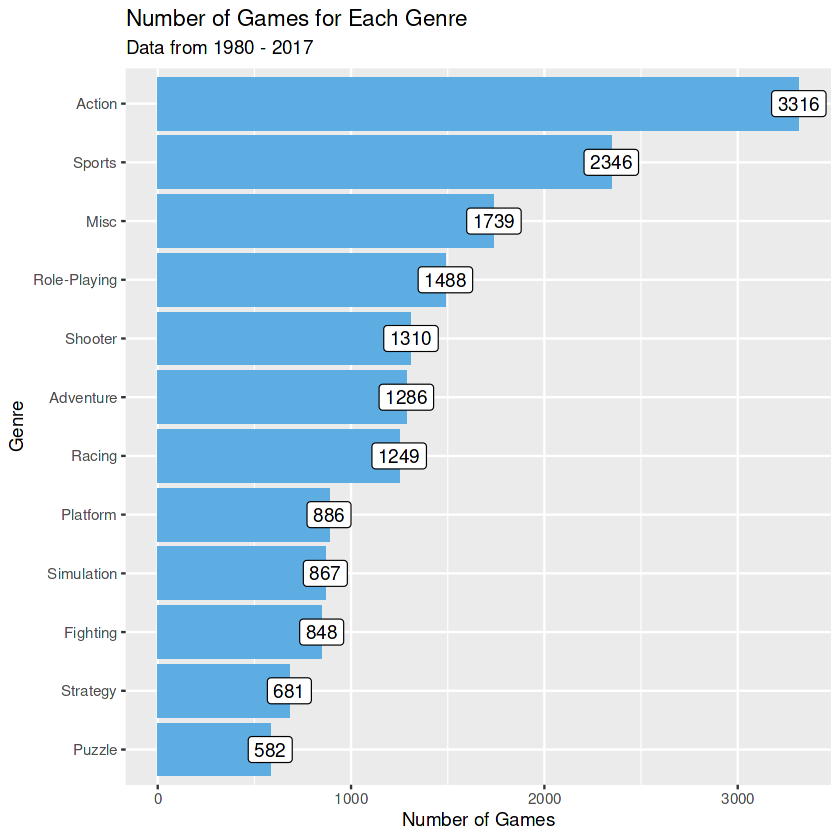

In [20]:
#Plot
ggplot(vg_genre, aes(y = reorder(genre, + number_games), x = number_games)) +
  geom_col(fill="#5DADE2") +
  labs(y="Genre", x="Number of Games", title = "Number of Games for Each Genre", 
       subtitle = "Data from 1980 - 2017") +
  geom_label(aes(label = number_games))

The data shows that the genre with the highest number is the Action genre, which leads quite far when compared to other genres. This is followed by Sports and Misc.

**#Genre Sales for Each Region**

In [21]:
#Data Manipulation 
vgs_genre_sale <- vgs %>%
  group_by(genre) %>%
  summarize(North_America = sum(na_sales),
            Europe = sum(eu_sales),
            Japan = sum(jp_sales),
            Others = sum(other_sales)) %>%
  pivot_longer(North_America:Others,
               names_to='region',
               values_to='sales')

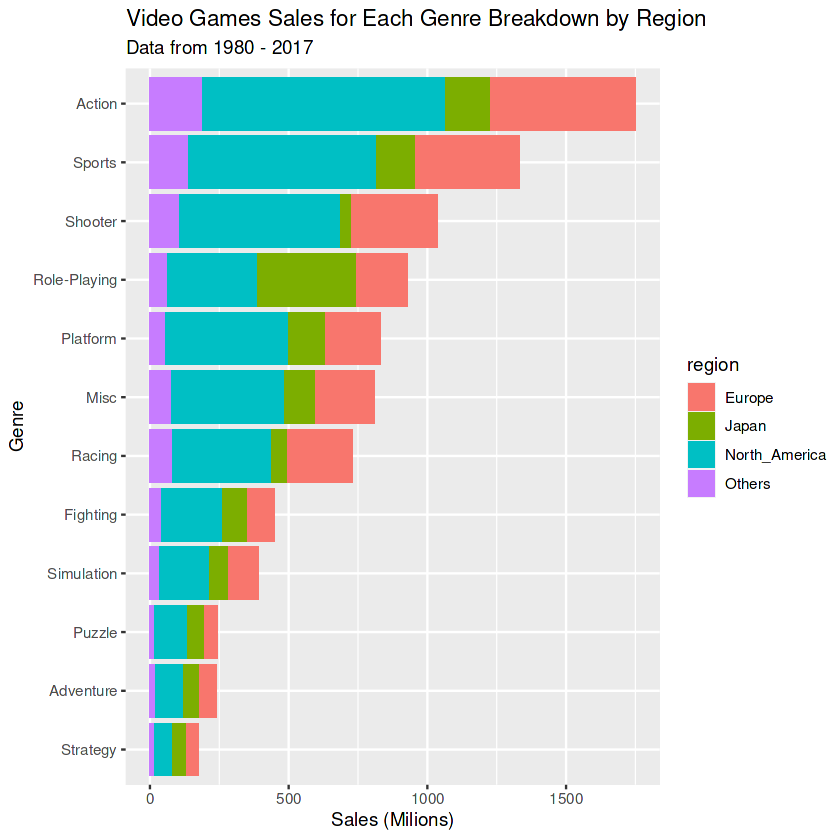

In [22]:
#plot
ggplot(vgs_genre_sale, aes(x = sales, y = reorder(genre, +sales), fill=region))+
geom_col() +
labs(x="Sales (Milions)",y="Genre", 
     title = "Video Games Sales for Each Genre Breakdown by Region", 
     subtitle = "Data from 1980 - 2017")

The most popular video game genre by sales is Action, followed by Sports and Shooter.
Below is a more readable graph of video game sales by genre in each region

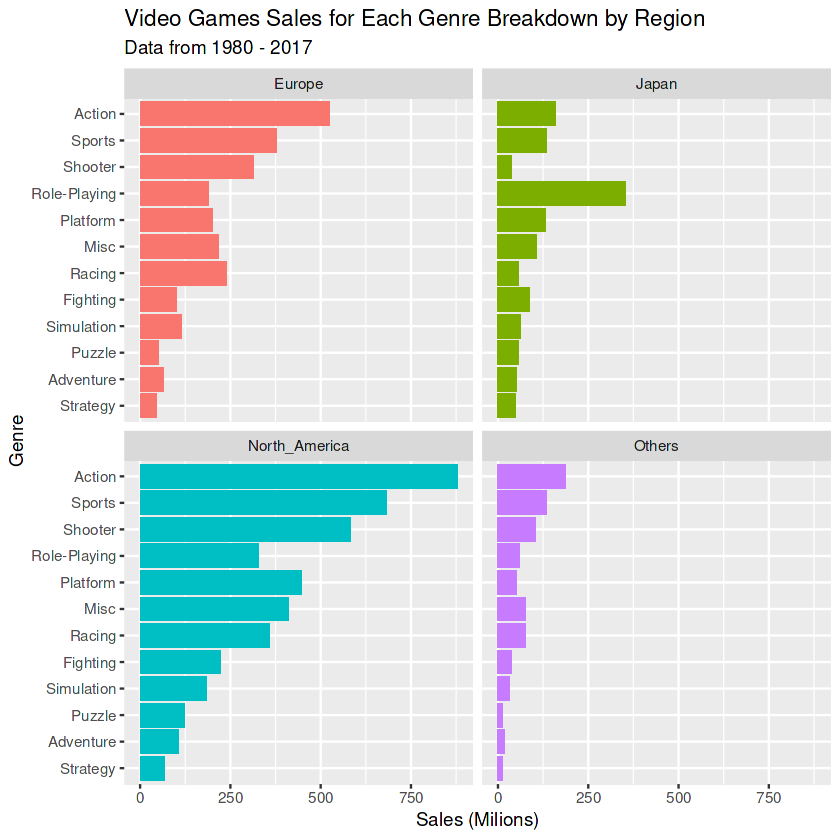

In [23]:
ggplot(vgs_genre_sale, aes(x = sales, y = reorder(genre, +sales), fill=region))+
  geom_col() +
  facet_wrap(~region) +
  theme(legend.position = "none") +
  labs(x="Sales (Milions)",y="Genre", 
       title = "Video Games Sales for Each Genre Breakdown by Region", 
       subtitle = "Data from 1980 - 2017")

It can be seen from the graph above:
* Most video game sales are in Europe and North America, sales in these regions are also dominated by the Action genre, and followed by the genre, sports, shooter. The same thing also applies to the Other region.
* While in the Japan region, the most video game sales are in the Role-Playing genre. No wonder, in Japan the RPJ or JRPG genre is very popular.

**Popularity of Video Game Genres Each Year by Sales**

`summarise()` has grouped output by 'genre'. You can override using the
`.groups` argument.


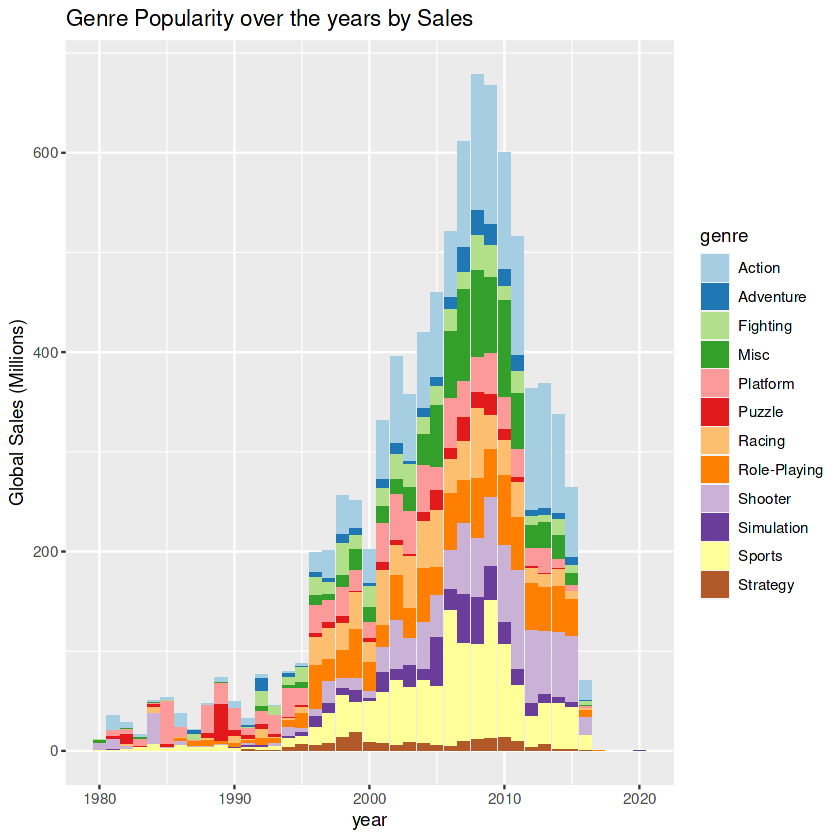

In [39]:
vgs %>%
  group_by (genre,year) %>%
  summarise(total_global_sales = sum(global_sales)) %>% drop_na() %>%
  ggplot(aes(x = year, y = total_global_sales, fill = genre)) + 
  geom_col(na.rm = TRUE) + scale_fill_brewer(palette = "Paired") +
  labs(title = "Genre Popularity over the years by Sales", 
       y = "Global Sales (Millions)")
#There will be a friendly warning message, we'll be fine

It shows that the peaks of most video games sales were between 2007 and 2008. It can also be seen that the highest sales are video games with Action, Shooter, and Sports genres.

**Top 10 Publisher by Number of Game Releases**

In [23]:
#Data Manipulation TOP 10 Publisher
vgs_pub <- vgs %>%
  group_by(publisher)%>%
  summarize(total_sales = sum(global_sales)) %>%
  arrange(desc(total_sales)) %>% 
  head(10)

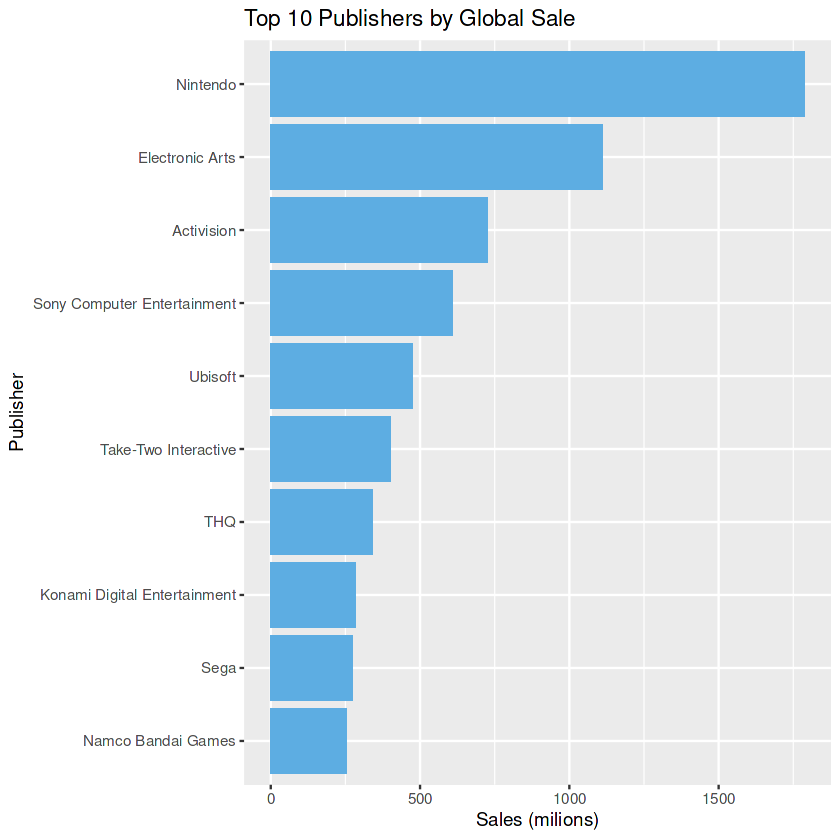

In [24]:
#Plot
ggplot(data = vgs_pub, aes(x = total_sales, y = reorder(publisher, +total_sales))) + 
  geom_col(fill="#5DADE2") +
  labs(title = "Top 10 Publishers by Global Sale", x= "Sales (milions)", 
       y = "Publisher") 

Nintendo is the publisher that launched the most video game titles. Followed by Electronic Arts, and Activision.

**Top 5 Plubliher by Genre**

In [44]:
vgs_pub_genre <- vgs %>%
  select(publisher, genre, global_sales) %>%
  filter(publisher%in%c("Nintendo","Electronic Arts","Activision","Sony Computer Entertainment","Ubisoft")) %>%
  group_by(publisher,genre) %>%
  arrange(desc(global_sales))

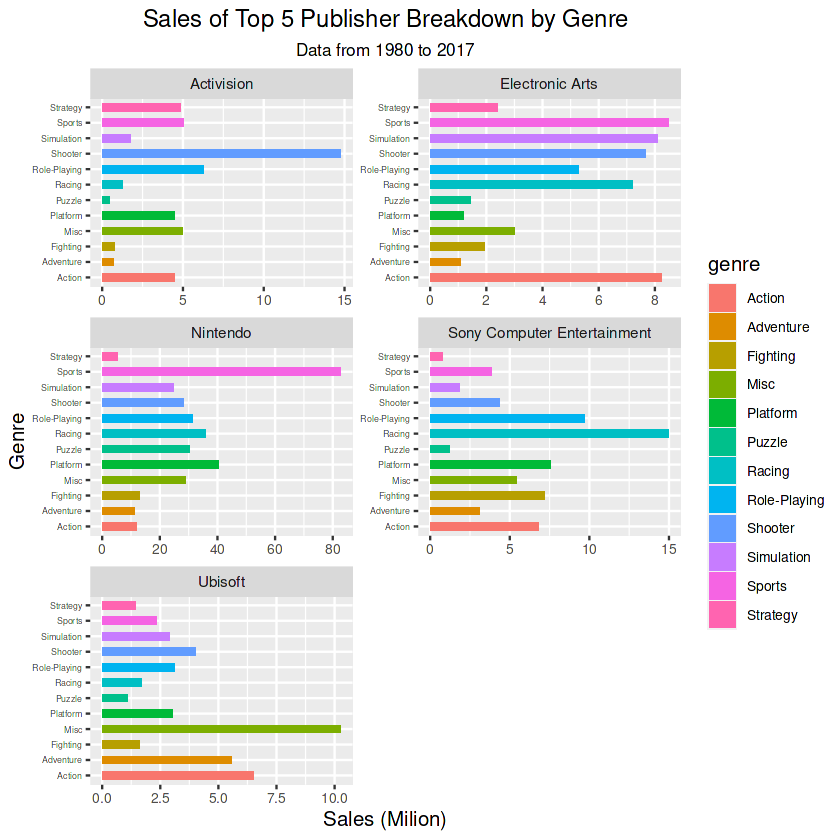

In [45]:
#Plot
ggplot(vgs_pub_genre,aes(x = global_sales,y = genre,fill=genre)) +
  geom_col(width=0.5, position = position_dodge(width=0.5))+
  facet_wrap(~publisher,nrow=3,ncol=2,scales = "free") +
  theme(plot.title = element_text(hjust=0.5,size=14),
        plot.subtitle = element_text(hjust=0.5,size=10),
        axis.text.x = element_text(size=8),
        axis.text.y = element_text(size=5),
        axis.title = element_text(size=12),
        legend.title = element_text(size=12),
        legend.text = element_text(size=8)) +
  labs(x="Sales (Milion)",y="Genre",
       title='Sales of Top 5 Publisher Breakdown by Genre',
       subtitle = 'Data from 1980 to 2017')

The data shows that each publisher has a characteristic reference for launching video games with certain genres.
* Activision's video game sales are dominated by games with the Shooters genre.
* Nintendo's video game sales are dominated by games with the Sport genre.
* Sony Computer Entertainment's Nintendo video game sales are dominated by games with the Racing genre.
* Ubisoft's video game sales are dominated by games with the Action genre
* Whereas Electronic Arts' video game sales are more spread out, most of which are in the sports, action, simulation, shooters, and racing genres.

Judging from the sales of video games by genre, it can be said that each publisher has its own specialization in the video game genre. Each has different specialties, except for Electronic Arts, which is more evenly distributed in video game sales by genre.

**Top 10 Games with highest global sales**

In [27]:
#Manipulation
top10 <- vgs %>% head(10)

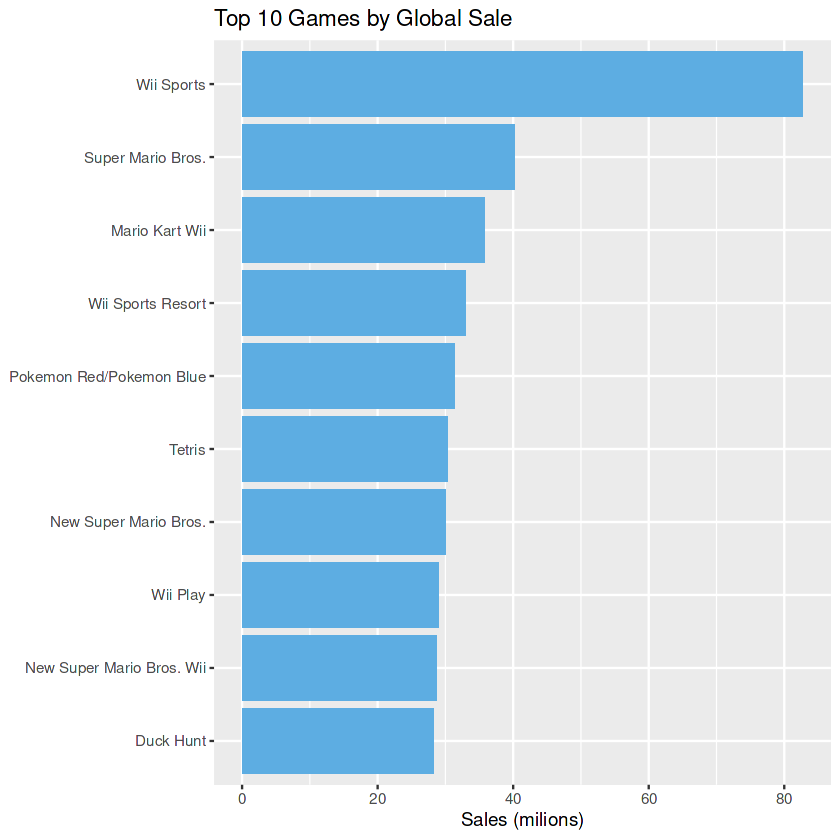

In [28]:
#Plot  
ggplot(data = top10, aes(x = global_sales, y = reorder(name, +global_sales))) +
       geom_col(fill="#5DADE2")+ theme(axis.title.y = element_blank()) +
       labs(title = "Top 10 Games by Global Sale", x = "Sales (milions)")

It can be seen that Wii Sports games are the games with the highest number of global sales, and lead by a considerable distance with other games.